# Snake Breed Classification

#### by- Praneesh Sharma

## Importing necessary libraries

In [1]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [2]:
#Basic Libraries
import pandas as pd
import numpy as np
import glob, os, shutil

# Machine learning Libraries
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras_preprocessing.image import ImageDataGenerator


# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter Notebook Utility
from IPython.display import clear_output

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Importing CSV files


In [3]:
train_df = pd.read_csv('/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train.csv')
test_df = pd.read_csv('/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/test.csv')


# Adding Prefix with the image_id
dataset = [train_df, test_df]
for data in dataset: 
    data['image_id'] = [filename + '.jpg' for filename in data['image_id']]

# Producing Class Counts alphabetically
class_counts = train_df['breed'].value_counts()
class_counts = pd.DataFrame({'breed': class_counts.index, 'count': class_counts.values})
class_counts.sort_values(['breed'], inplace = True)
class_counts.reset_index(drop=True)

classes = class_counts['breed'].values.tolist()
print(classes)

['agkistrodon-contortrix', 'agkistrodon-piscivorus', 'coluber-constrictor', 'crotalus-atrox', 'crotalus-horridus', 'crotalus-ruber', 'crotalus-scutulatus', 'crotalus-viridis', 'diadophis-punctatus', 'haldea-striatula', 'heterodon-platirhinos', 'lampropeltis-californiae', 'lampropeltis-triangulum', 'masticophis-flagellum', 'natrix-natrix', 'nerodia-erythrogaster', 'nerodia-fasciata', 'nerodia-rhombifer', 'nerodia-sipedon', 'opheodrys-aestivus', 'pantherophis-alleghaniensis', 'pantherophis-emoryi', 'pantherophis-guttatus', 'pantherophis-obsoletus', 'pantherophis-spiloides', 'pantherophis-vulpinus', 'pituophis-catenifer', 'rhinocheilus-lecontei', 'storeria-dekayi', 'storeria-occipitomaculata', 'thamnophis-elegans', 'thamnophis-marcianus', 'thamnophis-proximus', 'thamnophis-radix', 'thamnophis-sirtalis']


In [4]:
import os
import shutil

# Creating new train data directory
os.mkdir('dataset_imagenet_format/')

# Creating one folder for each of the image classes. 
for cls in classes:
    os.mkdir('/kaggle/working/dataset_imagenet_format' + '/' + cls) 

train_dir = '/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train'
new_train_dir = '/kaggle/working/dataset_imagenet_format'

In [5]:
# Copying the Train image files to their respective class folders in the training directory.  
for index , row in train_df.iterrows():
    img_path = train_dir + '/' + row['image_id']
    dst_path = new_train_dir + '/' + row['breed'] + '/' + row['image_id']
    shutil.copy(img_path, dst_path)

## Importing Images

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_data = data_generator.flow_from_dataframe(train_df, 
                                                directory='/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train',
                                                x_col = 'image_id', 
                                                y_col = 'breed',
                                                target_size = (256,256),
                                                batch_size = 32, 
                                                seed = 42,
                                                shuffle = True, 
                                                class_mode = 'sparse',
                                                subset = 'training')

valid_data = data_generator.flow_from_dataframe(train_df, 
                                                directory='/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train',
                                                x_col = 'image_id', 
                                                y_col = 'breed',
                                                target_size = (256,256),
                                                batch_size = 32, 
                                                seed = 42,
                                                shuffle = True, 
                                                class_mode = 'sparse',
                                                subset = 'validation')

Found 4407 validated image filenames belonging to 35 classes.
Found 1101 validated image filenames belonging to 35 classes.


In [7]:
# Dataset Hyperparameters
batch_size = 32
img_height = 224
img_width = 224
data_dir = '/kaggle/working/dataset_imagenet_format'
test_dir = '/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/test'
seed = np.random.randint(2000)
  
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,  
                                                               validation_split=0.2,  
                                                               subset="training",
                                                               seed=seed,  
                                                               image_size=(img_height, img_width),  
                                                               batch_size=batch_size)


train_ds_whole = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                     image_size=(img_height, img_width),
                                                                     batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,  
                                                             validation_split=0.2,
                                                             subset="validation",  
                                                             seed=seed,  
                                                             image_size=(img_height, img_width),  
                                                             batch_size=batch_size)

test_datagen=ImageDataGenerator()

test_df['image'] = test_df['image_id']+'.jpg'

test_generator=test_datagen.flow_from_dataframe(dataframe=test_df,
                                                directory=test_dir,
                                                x_col="image_id",
                                                y_col=None,
                                                batch_size=batch_size,
                                                shuffle=False,
                                                class_mode=None,
                                                target_size=(img_height, img_width))

class_names = train_ds.class_names
num_classes = len(class_names)

Found 5508 files belonging to 35 classes.
Using 4407 files for training.
Found 5508 files belonging to 35 classes.
Found 5508 files belonging to 35 classes.
Using 1101 files for validation.
Found 2361 validated image filenames.


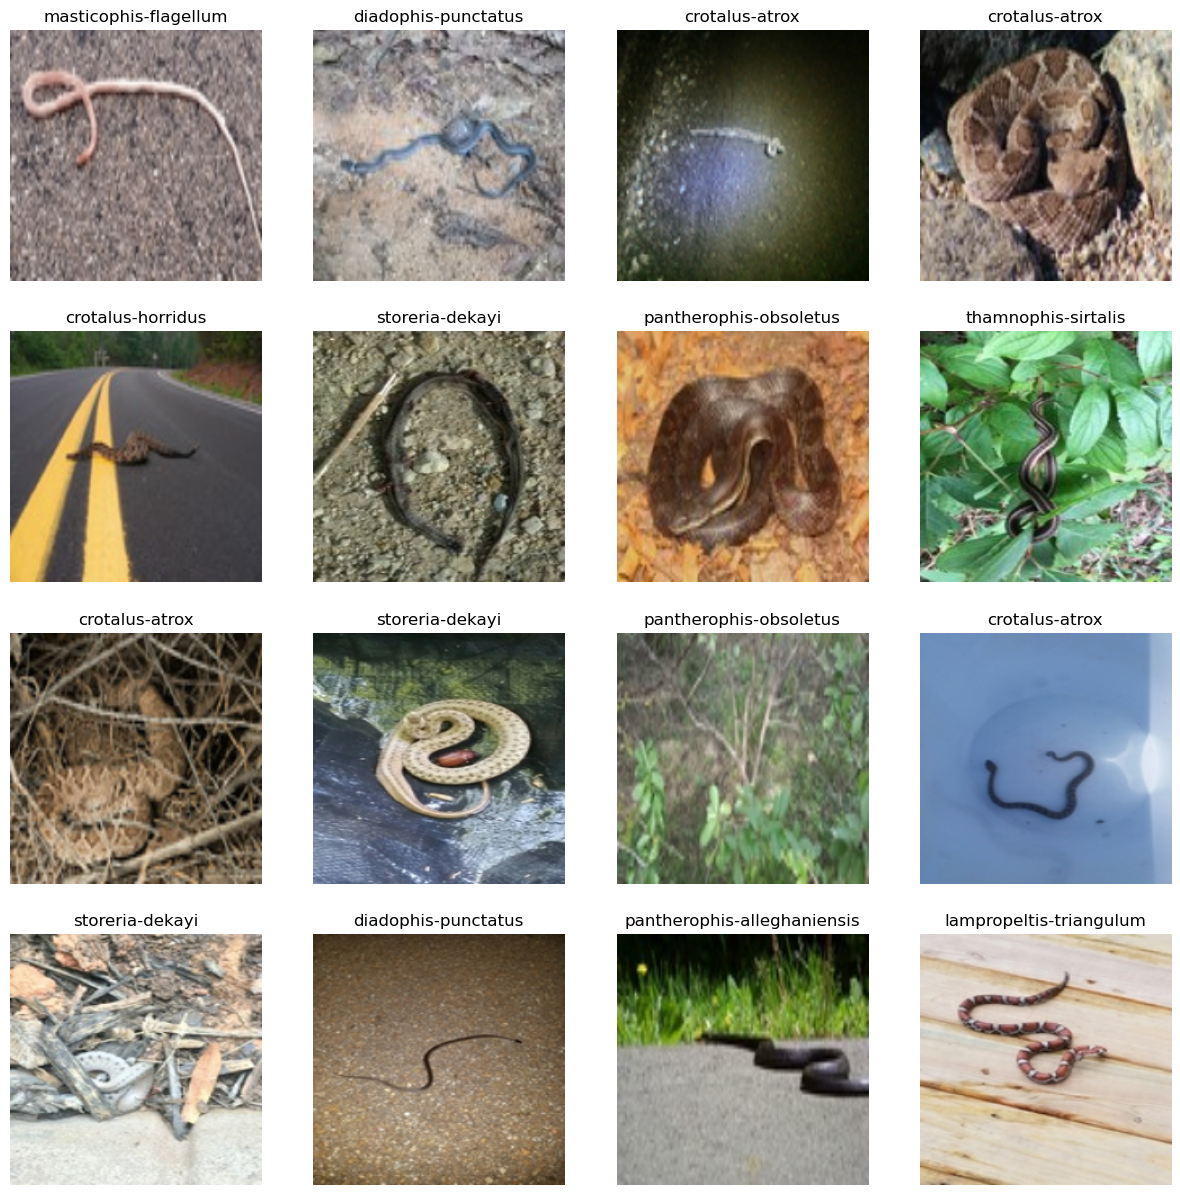

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):  
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Data Augmentation

In [9]:
# Setting The AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Data Augmentation PipeLine
data_augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal",
                                                                                      input_shape=(img_height, img_width,3)),
                                         layers.experimental.preprocessing.RandomContrast(0.2), 
                                         layers.experimental.preprocessing.RandomRotation(0.2),
                                         layers.experimental.preprocessing.RandomZoom(0.2)])

## Model Creation

In [10]:
# model = tf.keras.Sequential([data_augmentation, 
#                              layers.experimental.preprocessing.Rescaling(1./255),  
#                              layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
#                              layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
#                              layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),  
#                              layers.Dropout(0.2),
#                              layers.Flatten(),  
#                              layers.Dense(128, activation='relu'),  
#                              layers.Dense(num_classes)])

# data_augmentation,
model = Sequential([data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer= 'l2'),
                    layers.BatchNormalization(),
                    layers.MaxPooling2D(),

                    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
                    layers.BatchNormalization(),
                    layers.MaxPooling2D(),

                    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer= 'l2'),
                    layers.BatchNormalization(),
                    layers.MaxPooling2D(),

                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes, activation = 'softmax')])


checkpoint = ModelCheckpoint(filepath='best_weights.hdf5',
                             save_weights_only=True,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True)

model.compile(optimizer='sgd',    
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),    
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)     

## Fitting the Model/ Training

In [11]:
hist = model.fit(train_ds,
                 validation_data=val_ds, 
                 epochs=40, 
                 callbacks = [checkpoint])

Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-07-02 14:42:22.290282: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


138/138 [==============================] - 62s 365ms/step - loss: 4.9186 - accuracy: 0.0828 - val_loss: 5.8346 - val_accuracy: 0.0636
Epoch 2/40
138/138 [==============================] - 47s 339ms/step - loss: 4.6507 - accuracy: 0.1085 - val_loss: 5.6036 - val_accuracy: 0.0590
Epoch 3/40
138/138 [==============================] - 47s 338ms/step - loss: 4.5391 - accuracy: 0.1121 - val_loss: 5.0997 - val_accuracy: 0.0699
Epoch 4/40
138/138 [==============================] - 47s 338ms/step - loss: 4.4667 - accuracy: 0.1162 - val_loss: 4.4714 - val_accuracy: 0.0954
Epoch 5/40
138/138 [==============================] - 47s 341ms/step - loss: 4.3939 - accuracy: 0.1166 - val_loss: 4.4116 - val_accuracy: 0.1026
Epoch 6/40
138/138 [==============================] - 47s 342ms/step - loss: 4.3237 - accuracy: 0.1207 - val_loss: 4.3340 - val_accuracy: 0.1063
Epoch 7/40
138/138 [==============================] - 47s 342ms/step - loss: 4.2621 - accuracy: 0.1239 - val_loss: 4.2693 - val_accuracy: 0.1

## Accuracy and Error Graphs

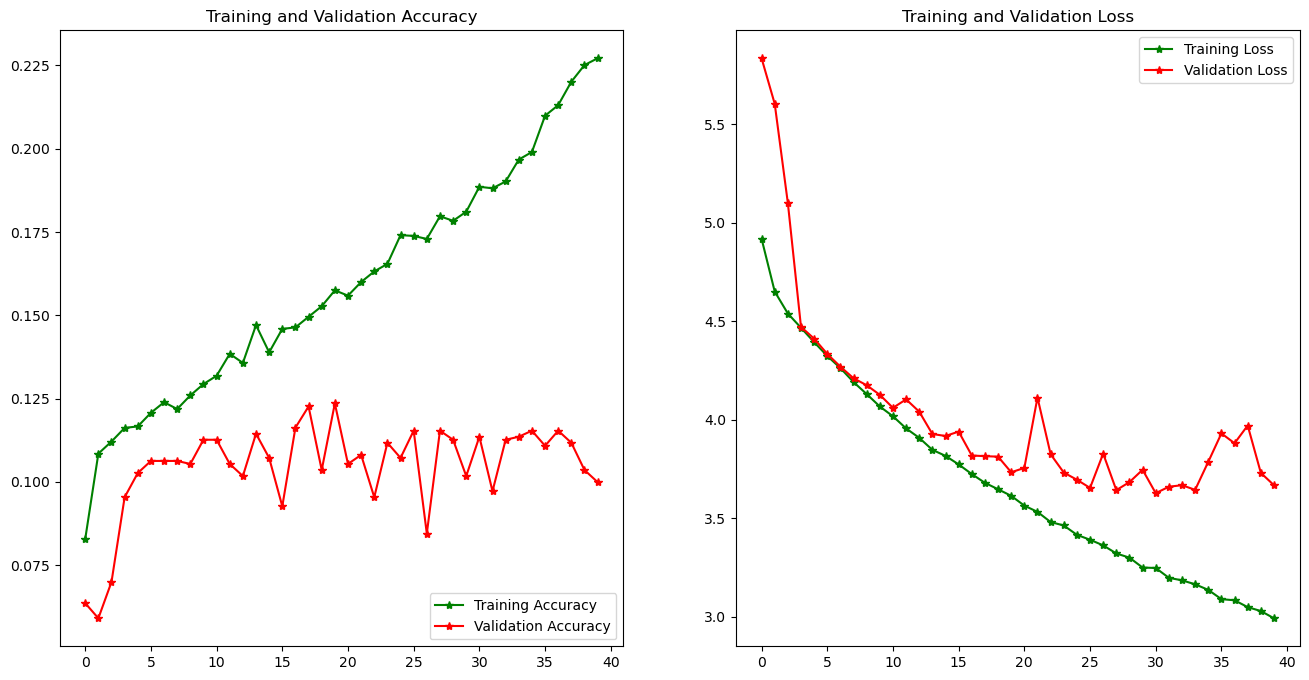

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot( acc, label='Training Accuracy', marker = '*', color = 'g')
plt.plot(val_acc, label='Validation Accuracy', marker = '*', color = 'r')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss', marker = '*', color = 'g')
plt.plot(val_loss, label='Validation Loss', marker = '*', color = 'r')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
from tensorflow import keras

def get_prediction(model, path): 
    img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    return class_names[np.argmax(score)], 100 * np.max(score)


test_paths = [test_dir + '/' + path for path in  test_df['image_id']]
predictions = []
from tqdm import tqdm
for path in tqdm(test_paths):
    predictions.append(get_prediction(model, path)[0])

  0%|          | 0/2361 [00:00<?, ?it/s]

1/1 [==============================] - 0s 288ms/step


  0%|          | 1/2361 [00:00<14:24,  2.73it/s]

1/1 [==============================] - 0s 39ms/step


  0%|          | 3/2361 [00:00<05:55,  6.63it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 5/2361 [00:00<04:18,  9.10it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 7/2361 [00:00<03:32, 11.06it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 9/2361 [00:00<03:16, 11.95it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 11/2361 [00:01<03:07, 12.53it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 13/2361 [00:01<03:01, 12.95it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 15/2361 [00:01<02:49, 13.84it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 17/2361 [00:01<02:44, 14.27it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 19/2361 [00:01<02:36, 14.92it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 21/2361 [00:01<02:31, 15.48it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 23/2361 [00:01<02:27, 15.85it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 25/2361 [00:01<02:27, 15.79it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 27/2361 [00:02<02:27, 15.84it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 29/2361 [00:02<02:29, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 31/2361 [00:02<02:41, 14.42it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 33/2361 [00:02<02:44, 14.18it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 35/2361 [00:02<02:44, 14.14it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 37/2361 [00:02<02:38, 14.64it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 39/2361 [00:02<02:34, 15.07it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 41/2361 [00:03<02:30, 15.42it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 43/2361 [00:03<02:29, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 45/2361 [00:03<02:29, 15.45it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 47/2361 [00:03<02:27, 15.66it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 49/2361 [00:03<02:26, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 51/2361 [00:03<02:35, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 53/2361 [00:03<02:42, 14.22it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 55/2361 [00:03<02:42, 14.21it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 57/2361 [00:04<02:39, 14.48it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 59/2361 [00:04<02:37, 14.58it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 61/2361 [00:04<02:38, 14.55it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 63/2361 [00:04<02:37, 14.60it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 65/2361 [00:04<02:42, 14.10it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 67/2361 [00:04<02:40, 14.33it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 69/2361 [00:04<02:36, 14.64it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 71/2361 [00:05<04:33,  8.37it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 73/2361 [00:05<04:00,  9.50it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 75/2361 [00:05<04:05,  9.33it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 77/2361 [00:05<03:58,  9.56it/s]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 79/2361 [00:06<04:03,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 81/2361 [00:06<04:04,  9.33it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 82/2361 [00:06<04:11,  9.08it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 83/2361 [00:06<04:13,  8.97it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▎         | 84/2361 [00:06<04:14,  8.94it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▎         | 86/2361 [00:06<04:01,  9.41it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▎         | 87/2361 [00:07<03:59,  9.48it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 89/2361 [00:07<03:34, 10.60it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 91/2361 [00:07<03:10, 11.89it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 93/2361 [00:07<02:53, 13.07it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 95/2361 [00:07<02:41, 14.00it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 97/2361 [00:07<02:39, 14.17it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 99/2361 [00:07<02:38, 14.27it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 101/2361 [00:08<02:45, 13.64it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 103/2361 [00:08<02:51, 13.17it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 105/2361 [00:08<02:49, 13.35it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 107/2361 [00:08<02:46, 13.53it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 109/2361 [00:08<02:38, 14.18it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 111/2361 [00:08<02:39, 14.14it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 113/2361 [00:08<02:32, 14.76it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 115/2361 [00:09<02:30, 14.89it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 117/2361 [00:09<02:28, 15.16it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 119/2361 [00:09<02:32, 14.70it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 121/2361 [00:09<02:36, 14.27it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 123/2361 [00:09<02:38, 14.08it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 125/2361 [00:09<02:40, 13.97it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 127/2361 [00:09<02:34, 14.44it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 129/2361 [00:10<02:35, 14.37it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 131/2361 [00:10<02:36, 14.25it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 133/2361 [00:10<02:34, 14.39it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 135/2361 [00:10<02:33, 14.54it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 137/2361 [00:10<02:44, 13.48it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 139/2361 [00:10<02:41, 13.76it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 141/2361 [00:10<02:40, 13.83it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 143/2361 [00:11<02:43, 13.56it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 145/2361 [00:11<02:39, 13.87it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 147/2361 [00:11<02:38, 13.98it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 149/2361 [00:11<02:33, 14.44it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 151/2361 [00:11<02:31, 14.63it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 153/2361 [00:11<02:26, 15.07it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 155/2361 [00:11<02:23, 15.41it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 157/2361 [00:11<02:20, 15.64it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 159/2361 [00:12<02:25, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 161/2361 [00:12<02:38, 13.84it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 163/2361 [00:12<02:41, 13.60it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 165/2361 [00:12<02:38, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 167/2361 [00:12<02:37, 13.95it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 169/2361 [00:12<02:34, 14.15it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 171/2361 [00:12<02:29, 14.66it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 173/2361 [00:13<02:25, 15.02it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 175/2361 [00:13<02:23, 15.28it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 177/2361 [00:13<02:28, 14.67it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 179/2361 [00:13<02:32, 14.31it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 181/2361 [00:13<02:34, 14.10it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 183/2361 [00:13<02:36, 13.95it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 185/2361 [00:13<02:41, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 187/2361 [00:14<02:38, 13.73it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 189/2361 [00:14<02:32, 14.21it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 191/2361 [00:14<02:27, 14.67it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 193/2361 [00:14<02:22, 15.17it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 195/2361 [00:14<02:19, 15.55it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 197/2361 [00:14<02:19, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 199/2361 [00:14<02:17, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 201/2361 [00:14<02:20, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 203/2361 [00:15<02:28, 14.53it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 205/2361 [00:15<02:36, 13.80it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 207/2361 [00:15<02:32, 14.12it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 209/2361 [00:15<02:27, 14.63it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 211/2361 [00:15<02:22, 15.08it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 213/2361 [00:15<02:18, 15.47it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 215/2361 [00:15<02:19, 15.36it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 217/2361 [00:16<02:17, 15.63it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 219/2361 [00:16<02:19, 15.34it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 221/2361 [00:16<02:20, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 223/2361 [00:16<02:30, 14.21it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 225/2361 [00:16<02:34, 13.86it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 227/2361 [00:16<02:33, 13.94it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 229/2361 [00:16<02:25, 14.63it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 231/2361 [00:17<02:22, 14.95it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 233/2361 [00:17<02:22, 14.98it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 235/2361 [00:17<02:23, 14.84it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 237/2361 [00:17<02:29, 14.24it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 239/2361 [00:17<02:23, 14.77it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 241/2361 [00:17<02:25, 14.57it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 243/2361 [00:17<02:32, 13.90it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 245/2361 [00:18<02:41, 13.12it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 247/2361 [00:18<02:37, 13.46it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 249/2361 [00:18<02:34, 13.67it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 251/2361 [00:18<02:36, 13.52it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 253/2361 [00:18<02:30, 13.99it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 255/2361 [00:18<02:24, 14.60it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 257/2361 [00:18<02:19, 15.09it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 259/2361 [00:18<02:18, 15.21it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 261/2361 [00:19<02:17, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 263/2361 [00:19<02:20, 14.91it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 265/2361 [00:19<02:26, 14.30it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 267/2361 [00:19<02:26, 14.32it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 269/2361 [00:19<02:25, 14.36it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 271/2361 [00:19<02:21, 14.80it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 273/2361 [00:19<02:18, 15.11it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 275/2361 [00:20<02:18, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 277/2361 [00:20<02:24, 14.47it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 279/2361 [00:20<02:27, 14.15it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 281/2361 [00:20<02:40, 12.93it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 283/2361 [00:20<02:37, 13.19it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 285/2361 [00:20<02:35, 13.35it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 287/2361 [00:20<02:35, 13.33it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 289/2361 [00:21<02:29, 13.89it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 291/2361 [00:21<02:28, 13.92it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 293/2361 [00:21<02:22, 14.55it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 295/2361 [00:21<02:19, 14.86it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 297/2361 [00:21<02:14, 15.35it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 299/2361 [00:21<02:10, 15.75it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 301/2361 [00:21<02:09, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 303/2361 [00:22<02:11, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 305/2361 [00:22<02:21, 14.53it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 307/2361 [00:22<02:26, 14.06it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 309/2361 [00:22<02:22, 14.37it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 311/2361 [00:22<02:17, 14.87it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 313/2361 [00:22<02:16, 15.02it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 315/2361 [00:22<02:13, 15.37it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 317/2361 [00:22<02:10, 15.67it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 319/2361 [00:23<02:09, 15.79it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 321/2361 [00:23<02:07, 15.96it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 323/2361 [00:23<02:12, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 325/2361 [00:23<02:16, 14.95it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 327/2361 [00:23<02:20, 14.52it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 329/2361 [00:23<02:22, 14.29it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 331/2361 [00:23<02:23, 14.16it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 333/2361 [00:24<02:20, 14.42it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 335/2361 [00:24<02:16, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 337/2361 [00:24<02:15, 14.93it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 339/2361 [00:24<02:12, 15.23it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 341/2361 [00:24<02:11, 15.39it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 343/2361 [00:24<02:08, 15.66it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 345/2361 [00:24<02:06, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 347/2361 [00:24<02:14, 14.98it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 349/2361 [00:25<02:21, 14.24it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 351/2361 [00:25<02:24, 13.93it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 353/2361 [00:25<02:18, 14.52it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 355/2361 [00:25<02:16, 14.72it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 357/2361 [00:25<02:12, 15.10it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 359/2361 [00:25<02:10, 15.32it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 361/2361 [00:25<02:06, 15.79it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 363/2361 [00:26<02:09, 15.41it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 365/2361 [00:26<02:07, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 367/2361 [00:26<02:12, 15.11it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 369/2361 [00:26<02:17, 14.50it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 371/2361 [00:26<02:18, 14.42it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 373/2361 [00:26<02:15, 14.72it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 375/2361 [00:26<02:10, 15.26it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 377/2361 [00:26<02:13, 14.85it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 379/2361 [00:27<02:14, 14.74it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 381/2361 [00:27<02:10, 15.20it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 383/2361 [00:27<02:06, 15.60it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▋        | 385/2361 [00:27<02:05, 15.77it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▋        | 387/2361 [00:27<02:03, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 389/2361 [00:27<02:09, 15.25it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 391/2361 [00:27<02:12, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 393/2361 [00:28<02:13, 14.79it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 395/2361 [00:28<02:13, 14.74it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 397/2361 [00:28<02:11, 14.98it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 399/2361 [00:28<02:09, 15.15it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 401/2361 [00:28<02:10, 14.96it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 403/2361 [00:28<02:08, 15.21it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 405/2361 [00:28<02:08, 15.27it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 407/2361 [00:28<02:05, 15.54it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 409/2361 [00:29<02:04, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 411/2361 [00:29<02:12, 14.75it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 413/2361 [00:29<02:19, 14.00it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 415/2361 [00:29<02:17, 14.16it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 417/2361 [00:29<02:10, 14.88it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 419/2361 [00:29<02:09, 15.00it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 421/2361 [00:29<02:07, 15.22it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 423/2361 [00:30<02:04, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 425/2361 [00:30<02:04, 15.51it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 427/2361 [00:30<02:02, 15.83it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 429/2361 [00:30<02:01, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 431/2361 [00:30<02:22, 13.55it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 433/2361 [00:30<02:25, 13.29it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 435/2361 [00:30<02:21, 13.60it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▊        | 437/2361 [00:31<02:14, 14.33it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▊        | 439/2361 [00:31<02:13, 14.45it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▊        | 441/2361 [00:31<02:09, 14.86it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 443/2361 [00:31<02:07, 15.05it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 445/2361 [00:31<02:03, 15.55it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 447/2361 [00:31<02:01, 15.80it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 449/2361 [00:31<02:02, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 451/2361 [00:31<02:02, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 453/2361 [00:32<02:07, 14.94it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 455/2361 [00:32<02:09, 14.69it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 457/2361 [00:32<02:14, 14.13it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 459/2361 [00:32<02:10, 14.58it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 461/2361 [00:32<02:07, 14.92it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 463/2361 [00:32<02:03, 15.33it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 465/2361 [00:32<02:01, 15.62it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 467/2361 [00:32<02:01, 15.60it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 469/2361 [00:33<02:00, 15.72it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 471/2361 [00:33<02:00, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 473/2361 [00:33<02:06, 14.88it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 475/2361 [00:33<02:12, 14.22it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 477/2361 [00:33<02:12, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 479/2361 [00:33<02:07, 14.74it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 481/2361 [00:33<02:07, 14.76it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 483/2361 [00:34<02:03, 15.21it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 485/2361 [00:34<02:02, 15.32it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 487/2361 [00:34<02:00, 15.50it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 489/2361 [00:34<01:59, 15.64it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 491/2361 [00:34<01:57, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 493/2361 [00:34<02:00, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 495/2361 [00:34<02:08, 14.57it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 497/2361 [00:34<02:10, 14.30it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 499/2361 [00:35<02:10, 14.26it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 501/2361 [00:35<02:07, 14.62it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 503/2361 [00:35<02:05, 14.83it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 505/2361 [00:35<02:01, 15.29it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 507/2361 [00:35<01:58, 15.64it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 509/2361 [00:35<01:55, 15.98it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 511/2361 [00:35<01:56, 15.95it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 513/2361 [00:36<01:55, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 515/2361 [00:36<01:58, 15.53it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 517/2361 [00:36<02:04, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 519/2361 [00:36<02:09, 14.22it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 521/2361 [00:36<02:11, 13.95it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 523/2361 [00:36<02:09, 14.16it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 525/2361 [00:36<02:07, 14.42it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 527/2361 [00:36<02:03, 14.83it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 529/2361 [00:37<02:02, 14.96it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 531/2361 [00:37<02:22, 12.87it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 533/2361 [00:37<02:35, 11.73it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 535/2361 [00:37<02:47, 10.88it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 537/2361 [00:37<02:53, 10.52it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 539/2361 [00:38<02:58, 10.19it/s]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 541/2361 [00:38<03:00, 10.09it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 543/2361 [00:38<02:56, 10.30it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 545/2361 [00:38<02:41, 11.23it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 547/2361 [00:38<02:28, 12.25it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 549/2361 [00:38<02:22, 12.73it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 551/2361 [00:39<02:20, 12.90it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 553/2361 [00:39<02:18, 13.07it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 555/2361 [00:39<02:12, 13.60it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 557/2361 [00:39<02:09, 13.89it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 559/2361 [00:39<02:03, 14.54it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 561/2361 [00:39<01:59, 15.11it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 563/2361 [00:39<01:58, 15.23it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 565/2361 [00:40<02:01, 14.82it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 567/2361 [00:40<02:00, 14.88it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 569/2361 [00:40<01:59, 15.01it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▍       | 571/2361 [00:40<02:10, 13.70it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 573/2361 [00:40<02:19, 12.77it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 575/2361 [00:40<02:15, 13.22it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 577/2361 [00:40<02:08, 13.90it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 579/2361 [00:41<02:02, 14.54it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 581/2361 [00:41<01:58, 15.01it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 583/2361 [00:41<01:58, 14.96it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 585/2361 [00:41<01:56, 15.19it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 587/2361 [00:41<01:56, 15.22it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 589/2361 [00:41<01:53, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 591/2361 [00:41<01:59, 14.86it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 593/2361 [00:41<02:04, 14.19it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 595/2361 [00:42<02:04, 14.23it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 597/2361 [00:42<02:00, 14.70it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 599/2361 [00:42<01:58, 14.93it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 601/2361 [00:42<01:57, 15.02it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 603/2361 [00:42<01:54, 15.37it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 605/2361 [00:42<01:51, 15.69it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 607/2361 [00:42<01:50, 15.88it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 609/2361 [00:43<01:49, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 611/2361 [00:43<01:57, 14.95it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 613/2361 [00:43<02:02, 14.32it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 615/2361 [00:43<02:03, 14.18it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 617/2361 [00:43<01:59, 14.63it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 619/2361 [00:43<01:57, 14.83it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▋       | 621/2361 [00:43<01:54, 15.20it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▋       | 623/2361 [00:43<01:52, 15.49it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 625/2361 [00:44<01:50, 15.76it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 627/2361 [00:44<01:48, 15.94it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 629/2361 [00:44<01:50, 15.66it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 631/2361 [00:44<01:49, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 633/2361 [00:44<01:52, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 635/2361 [00:44<01:56, 14.77it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 637/2361 [00:44<02:01, 14.19it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 639/2361 [00:45<01:58, 14.47it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 641/2361 [00:45<01:56, 14.77it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 643/2361 [00:45<01:53, 15.20it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 645/2361 [00:45<01:51, 15.41it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 647/2361 [00:45<01:50, 15.56it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 649/2361 [00:45<01:48, 15.77it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 651/2361 [00:45<01:46, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 653/2361 [00:45<01:46, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 655/2361 [00:46<01:57, 14.49it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 657/2361 [00:46<02:01, 14.04it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 659/2361 [00:46<01:59, 14.26it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 661/2361 [00:46<01:55, 14.76it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 663/2361 [00:46<01:52, 15.10it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 665/2361 [00:46<01:52, 15.13it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 667/2361 [00:46<01:49, 15.49it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 669/2361 [00:46<01:46, 15.82it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 671/2361 [00:47<01:45, 15.98it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 673/2361 [00:47<01:47, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 675/2361 [00:47<01:55, 14.60it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 677/2361 [00:47<01:58, 14.25it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 679/2361 [00:47<02:06, 13.29it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 681/2361 [00:47<02:00, 13.95it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 683/2361 [00:47<02:00, 13.89it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 685/2361 [00:48<01:56, 14.37it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 687/2361 [00:48<01:53, 14.73it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 689/2361 [00:48<01:49, 15.21it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 691/2361 [00:48<01:53, 14.73it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 693/2361 [00:48<01:51, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 695/2361 [00:48<01:53, 14.70it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 697/2361 [00:48<01:55, 14.40it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 699/2361 [00:49<01:59, 13.96it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 701/2361 [00:49<01:58, 13.97it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 703/2361 [00:49<01:55, 14.36it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 705/2361 [00:49<01:51, 14.92it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 707/2361 [00:49<01:49, 15.09it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 709/2361 [00:49<01:48, 15.25it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 711/2361 [00:49<01:46, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 713/2361 [00:49<01:44, 15.76it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 715/2361 [00:50<01:43, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 717/2361 [00:50<01:53, 14.52it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 719/2361 [00:50<01:58, 13.81it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 721/2361 [00:50<02:09, 12.67it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 723/2361 [00:50<02:02, 13.34it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 725/2361 [00:50<01:55, 14.19it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 727/2361 [00:51<01:52, 14.47it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 729/2361 [00:51<01:50, 14.78it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 731/2361 [00:51<01:46, 15.34it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 733/2361 [00:51<01:45, 15.47it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 735/2361 [00:51<01:43, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 737/2361 [00:51<01:51, 14.53it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 739/2361 [00:51<01:53, 14.28it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 741/2361 [00:51<01:52, 14.40it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 743/2361 [00:52<01:52, 14.35it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 745/2361 [00:52<01:50, 14.58it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 747/2361 [00:52<01:52, 14.40it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 749/2361 [00:52<01:48, 14.87it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 751/2361 [00:52<01:44, 15.36it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 753/2361 [00:52<01:43, 15.57it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 755/2361 [00:52<01:44, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 757/2361 [00:53<01:48, 14.79it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 759/2361 [00:53<01:53, 14.07it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 761/2361 [00:53<01:59, 13.38it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 763/2361 [00:53<01:59, 13.34it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 765/2361 [00:53<01:56, 13.76it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 767/2361 [00:53<01:52, 14.19it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 769/2361 [00:53<01:48, 14.70it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 771/2361 [00:54<01:46, 14.94it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 773/2361 [00:54<01:45, 15.02it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 775/2361 [00:54<01:49, 14.55it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 777/2361 [00:54<01:53, 13.98it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 779/2361 [00:54<01:53, 13.88it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 781/2361 [00:54<01:53, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 783/2361 [00:54<01:49, 14.44it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 785/2361 [00:54<01:46, 14.80it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 787/2361 [00:55<01:44, 14.99it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 789/2361 [00:55<01:42, 15.30it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 791/2361 [00:55<01:43, 15.23it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 793/2361 [00:55<01:41, 15.41it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▎      | 795/2361 [00:55<01:41, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 797/2361 [00:55<01:43, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 799/2361 [00:55<01:49, 14.21it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 801/2361 [00:56<01:56, 13.34it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 803/2361 [00:56<01:51, 13.95it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 805/2361 [00:56<01:50, 14.09it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 807/2361 [00:56<01:47, 14.40it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 809/2361 [00:56<01:47, 14.44it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 811/2361 [00:56<01:45, 14.63it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 813/2361 [00:56<01:42, 15.05it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 815/2361 [00:57<01:41, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 817/2361 [00:57<01:44, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 819/2361 [00:57<01:51, 13.87it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 821/2361 [00:57<01:51, 13.82it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 823/2361 [00:57<01:49, 14.08it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 825/2361 [00:57<01:46, 14.42it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 827/2361 [00:57<01:45, 14.54it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 829/2361 [00:58<01:44, 14.69it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 831/2361 [00:58<01:46, 14.34it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 833/2361 [00:58<01:45, 14.47it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 835/2361 [00:58<01:43, 14.69it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 837/2361 [00:58<01:43, 14.76it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 839/2361 [00:58<01:46, 14.35it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 841/2361 [00:58<01:47, 14.15it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 843/2361 [00:58<01:45, 14.36it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 845/2361 [00:59<01:47, 14.07it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 847/2361 [00:59<01:44, 14.54it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 849/2361 [00:59<01:41, 14.95it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 851/2361 [00:59<01:39, 15.18it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 853/2361 [00:59<01:39, 15.14it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 855/2361 [00:59<01:37, 15.47it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▋      | 857/2361 [00:59<01:35, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 859/2361 [01:00<01:40, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 861/2361 [01:00<01:53, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 863/2361 [01:00<01:52, 13.32it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 865/2361 [01:00<02:00, 12.47it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 867/2361 [01:00<01:52, 13.31it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 869/2361 [01:00<01:46, 14.07it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 871/2361 [01:00<01:45, 14.10it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 873/2361 [01:01<01:42, 14.54it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 875/2361 [01:01<01:38, 15.13it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 877/2361 [01:01<01:37, 15.26it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 879/2361 [01:01<01:41, 14.56it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 881/2361 [01:01<01:45, 14.01it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 883/2361 [01:01<01:43, 14.27it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 885/2361 [01:01<01:40, 14.63it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 887/2361 [01:02<01:38, 15.02it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 889/2361 [01:02<01:36, 15.23it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 891/2361 [01:02<01:34, 15.55it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 893/2361 [01:02<01:33, 15.73it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 895/2361 [01:02<01:32, 15.88it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 897/2361 [01:02<01:34, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 899/2361 [01:02<01:39, 14.68it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 901/2361 [01:02<01:42, 14.19it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 903/2361 [01:03<01:42, 14.20it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 905/2361 [01:03<01:39, 14.71it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 907/2361 [01:03<01:38, 14.70it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 909/2361 [01:03<01:36, 15.09it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▊      | 911/2361 [01:03<01:35, 15.19it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▊      | 913/2361 [01:03<01:34, 15.40it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 915/2361 [01:03<01:31, 15.75it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 917/2361 [01:04<01:32, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 919/2361 [01:04<01:33, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 921/2361 [01:04<01:39, 14.46it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 923/2361 [01:04<01:41, 14.12it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 925/2361 [01:04<01:42, 13.95it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 927/2361 [01:04<01:42, 13.96it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 929/2361 [01:04<01:37, 14.64it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 931/2361 [01:04<01:35, 14.99it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 933/2361 [01:05<01:37, 14.57it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 935/2361 [01:05<01:37, 14.62it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 937/2361 [01:05<01:35, 14.98it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 939/2361 [01:05<01:33, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 941/2361 [01:05<01:37, 14.63it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 943/2361 [01:05<01:39, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 945/2361 [01:05<01:38, 14.33it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 947/2361 [01:06<01:35, 14.73it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 949/2361 [01:06<01:33, 15.06it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 951/2361 [01:06<01:32, 15.25it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 953/2361 [01:06<01:32, 15.18it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 955/2361 [01:06<01:30, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 957/2361 [01:06<01:29, 15.67it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 959/2361 [01:06<01:28, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 961/2361 [01:06<01:33, 15.00it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 963/2361 [01:07<01:37, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 965/2361 [01:07<01:48, 12.87it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 967/2361 [01:07<01:43, 13.53it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 969/2361 [01:07<01:41, 13.75it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 971/2361 [01:07<01:37, 14.21it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 973/2361 [01:07<01:33, 14.89it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 975/2361 [01:07<01:31, 15.22it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 977/2361 [01:08<01:29, 15.48it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 979/2361 [01:08<01:30, 15.25it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 981/2361 [01:08<01:33, 14.79it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 983/2361 [01:08<01:35, 14.38it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 985/2361 [01:08<01:45, 13.06it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 987/2361 [01:08<01:57, 11.66it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 989/2361 [01:09<02:02, 11.20it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 991/2361 [01:09<02:02, 11.22it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 993/2361 [01:09<02:03, 11.04it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 995/2361 [01:09<02:06, 10.82it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 997/2361 [01:09<02:13, 10.24it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 999/2361 [01:10<02:13, 10.22it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 1001/2361 [01:10<02:01, 11.17it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 1003/2361 [01:10<01:50, 12.26it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 1005/2361 [01:10<01:49, 12.39it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 1007/2361 [01:10<01:46, 12.74it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 1009/2361 [01:10<01:38, 13.70it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 1011/2361 [01:10<01:37, 13.84it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 1013/2361 [01:11<01:33, 14.45it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 1015/2361 [01:11<01:37, 13.80it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 1017/2361 [01:11<01:38, 13.69it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 1019/2361 [01:11<01:39, 13.51it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 1021/2361 [01:11<01:35, 14.01it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 1023/2361 [01:11<01:32, 14.50it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 1025/2361 [01:11<01:30, 14.76it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 1027/2361 [01:12<01:28, 15.08it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▎     | 1029/2361 [01:12<01:25, 15.50it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▎     | 1031/2361 [01:12<01:24, 15.70it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1033/2361 [01:12<01:25, 15.58it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 1035/2361 [01:12<01:24, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 1037/2361 [01:12<01:28, 14.95it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 1039/2361 [01:12<01:30, 14.53it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1041/2361 [01:12<01:30, 14.52it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 1043/2361 [01:13<01:29, 14.77it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 1045/2361 [01:13<01:26, 15.17it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 1047/2361 [01:13<01:26, 15.21it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 1049/2361 [01:13<01:23, 15.65it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 1051/2361 [01:13<01:25, 15.26it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 1053/2361 [01:13<01:23, 15.64it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 1055/2361 [01:13<01:24, 15.50it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 1057/2361 [01:13<01:25, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 1059/2361 [01:14<01:28, 14.66it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 1061/2361 [01:14<01:34, 13.83it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 1063/2361 [01:14<01:32, 14.09it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 1065/2361 [01:14<01:30, 14.35it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▌     | 1067/2361 [01:14<01:27, 14.84it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 1069/2361 [01:14<01:27, 14.71it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 1071/2361 [01:14<01:26, 14.88it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 1073/2361 [01:15<01:25, 15.08it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 1075/2361 [01:15<01:24, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 1077/2361 [01:15<01:23, 15.29it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 1079/2361 [01:15<01:30, 14.23it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 1081/2361 [01:15<01:31, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 1083/2361 [01:15<01:30, 14.07it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 1085/2361 [01:15<01:28, 14.49it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 1087/2361 [01:16<01:29, 14.31it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 1089/2361 [01:16<01:27, 14.60it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 1091/2361 [01:16<01:25, 14.78it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▋     | 1093/2361 [01:16<01:25, 14.81it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 1095/2361 [01:16<01:26, 14.67it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▋     | 1097/2361 [01:16<01:27, 14.51it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 1099/2361 [01:16<01:30, 14.00it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 1101/2361 [01:17<01:32, 13.68it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 1103/2361 [01:17<01:35, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1105/2361 [01:17<01:35, 13.22it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 1107/2361 [01:17<01:29, 14.04it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 1109/2361 [01:17<01:26, 14.48it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 1111/2361 [01:17<01:22, 15.14it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 1113/2361 [01:17<01:20, 15.54it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 1115/2361 [01:18<01:23, 14.98it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 1117/2361 [01:18<01:22, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 1119/2361 [01:18<01:25, 14.54it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 1121/2361 [01:18<01:29, 13.87it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 1123/2361 [01:18<01:30, 13.64it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 1125/2361 [01:18<01:29, 13.79it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 1127/2361 [01:18<01:25, 14.47it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 1129/2361 [01:18<01:21, 15.11it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 1131/2361 [01:19<01:19, 15.40it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 1133/2361 [01:19<01:19, 15.42it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 1135/2361 [01:19<01:18, 15.68it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 1137/2361 [01:19<01:17, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 1139/2361 [01:19<01:19, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 1141/2361 [01:19<01:25, 14.19it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 1143/2361 [01:19<01:27, 13.91it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 1145/2361 [01:20<01:27, 13.95it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▊     | 1147/2361 [01:20<01:26, 14.07it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▊     | 1149/2361 [01:20<01:23, 14.43it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 1151/2361 [01:20<01:35, 12.67it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 1153/2361 [01:20<01:31, 13.17it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 1155/2361 [01:20<01:27, 13.85it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 1157/2361 [01:20<01:23, 14.46it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 1159/2361 [01:21<01:27, 13.80it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 1161/2361 [01:21<01:30, 13.27it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 1163/2361 [01:21<01:28, 13.61it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 1165/2361 [01:21<01:24, 14.09it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 1167/2361 [01:21<01:22, 14.50it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 1169/2361 [01:21<01:20, 14.78it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 1171/2361 [01:21<01:20, 14.72it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 1173/2361 [01:22<01:18, 15.17it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 1175/2361 [01:22<01:19, 14.97it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 1177/2361 [01:22<01:19, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 1179/2361 [01:22<01:20, 14.70it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 1181/2361 [01:22<01:22, 14.31it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 1183/2361 [01:22<01:22, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


 50%|█████     | 1185/2361 [01:22<01:21, 14.50it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 1187/2361 [01:23<01:21, 14.46it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 1189/2361 [01:23<01:18, 14.93it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 1191/2361 [01:23<01:16, 15.20it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 1193/2361 [01:23<01:18, 14.88it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1195/2361 [01:23<01:17, 14.96it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1197/2361 [01:23<01:17, 15.08it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 1199/2361 [01:23<01:17, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 1201/2361 [01:23<01:22, 14.12it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 1203/2361 [01:24<01:23, 13.82it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1205/2361 [01:24<01:23, 13.90it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 1207/2361 [01:24<01:20, 14.38it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 1209/2361 [01:24<01:17, 14.92it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 1211/2361 [01:24<01:18, 14.57it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████▏    | 1213/2361 [01:24<01:16, 14.93it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████▏    | 1215/2361 [01:24<01:14, 15.35it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 1217/2361 [01:25<01:13, 15.66it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1219/2361 [01:25<01:13, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 1221/2361 [01:25<01:17, 14.63it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1223/2361 [01:25<01:21, 13.90it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 1225/2361 [01:25<01:22, 13.76it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 1227/2361 [01:25<01:21, 13.95it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 1229/2361 [01:25<01:18, 14.34it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 1231/2361 [01:26<01:19, 14.22it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1233/2361 [01:26<01:16, 14.69it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1235/2361 [01:26<01:13, 15.28it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1237/2361 [01:26<01:12, 15.47it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1239/2361 [01:26<01:11, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 1241/2361 [01:26<01:13, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 1243/2361 [01:26<01:15, 14.72it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 1245/2361 [01:26<01:19, 14.00it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 1247/2361 [01:27<01:17, 14.32it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1249/2361 [01:27<01:16, 14.46it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 1251/2361 [01:27<01:18, 14.17it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 1253/2361 [01:27<01:14, 14.86it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 1255/2361 [01:27<01:12, 15.35it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 1257/2361 [01:27<01:10, 15.56it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1259/2361 [01:27<01:11, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 1261/2361 [01:28<01:10, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 1263/2361 [01:28<01:14, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 1265/2361 [01:28<01:16, 14.42it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 1267/2361 [01:28<01:18, 13.95it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 1269/2361 [01:28<01:15, 14.53it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 1271/2361 [01:28<01:13, 14.89it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 1273/2361 [01:28<01:11, 15.28it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 1275/2361 [01:28<01:10, 15.50it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 1277/2361 [01:29<01:09, 15.58it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 1279/2361 [01:29<01:11, 15.23it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 1281/2361 [01:29<01:09, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 1283/2361 [01:29<01:10, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 1285/2361 [01:29<01:15, 14.34it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 1287/2361 [01:29<01:16, 13.96it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 1289/2361 [01:29<01:14, 14.38it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 1291/2361 [01:30<01:12, 14.85it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 1293/2361 [01:30<01:11, 14.97it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 1295/2361 [01:30<01:10, 15.10it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 1297/2361 [01:30<01:08, 15.53it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 1299/2361 [01:30<01:16, 13.83it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 1301/2361 [01:30<01:13, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 1303/2361 [01:30<01:13, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 1305/2361 [01:31<02:27,  7.18it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 1307/2361 [01:31<02:05,  8.39it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 1309/2361 [01:31<01:49,  9.60it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 1311/2361 [01:31<01:37, 10.78it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 1313/2361 [01:32<01:30, 11.60it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 1315/2361 [01:32<01:24, 12.37it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 1317/2361 [01:32<01:22, 12.66it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 1319/2361 [01:32<01:24, 12.36it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 1321/2361 [01:32<01:26, 12.03it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 1323/2361 [01:32<01:22, 12.53it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 1325/2361 [01:32<01:21, 12.64it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 1327/2361 [01:33<01:18, 13.13it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 1329/2361 [01:33<01:16, 13.46it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 1331/2361 [01:33<01:16, 13.49it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 1333/2361 [01:33<01:14, 13.83it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 1335/2361 [01:33<01:13, 14.02it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 1337/2361 [01:33<01:17, 13.29it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 1339/2361 [01:34<01:20, 12.68it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 1341/2361 [01:34<01:19, 12.87it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 1343/2361 [01:34<01:16, 13.31it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 1345/2361 [01:34<01:14, 13.61it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 1347/2361 [01:34<01:12, 14.00it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 1349/2361 [01:34<01:13, 13.83it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 1351/2361 [01:34<01:11, 14.05it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 1353/2361 [01:35<01:12, 13.95it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 1355/2361 [01:35<01:14, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 1357/2361 [01:35<01:19, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 1359/2361 [01:35<01:19, 12.62it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 1361/2361 [01:35<01:16, 13.00it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1363/2361 [01:35<01:14, 13.42it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 1365/2361 [01:35<01:11, 13.85it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 1367/2361 [01:36<01:13, 13.59it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1369/2361 [01:36<01:11, 13.91it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 1371/2361 [01:36<01:10, 14.09it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1373/2361 [01:36<01:09, 14.28it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 1375/2361 [01:36<01:15, 13.10it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 1377/2361 [01:36<01:17, 12.70it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1379/2361 [01:36<01:15, 12.95it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 1381/2361 [01:37<01:13, 13.38it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▊    | 1383/2361 [01:37<01:12, 13.47it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 1385/2361 [01:37<01:12, 13.40it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 1387/2361 [01:37<01:10, 13.78it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 1389/2361 [01:37<01:10, 13.87it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 1391/2361 [01:37<01:10, 13.79it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 1393/2361 [01:38<01:14, 12.95it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 1395/2361 [01:38<01:17, 12.47it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 1397/2361 [01:38<01:17, 12.45it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 1399/2361 [01:38<01:18, 12.29it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 1401/2361 [01:38<01:15, 12.65it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 1403/2361 [01:38<01:12, 13.19it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 1405/2361 [01:38<01:09, 13.84it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 1407/2361 [01:39<01:06, 14.33it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 1409/2361 [01:39<01:04, 14.70it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 1411/2361 [01:39<01:06, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 1413/2361 [01:39<01:10, 13.48it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 1415/2361 [01:39<01:11, 13.17it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 1417/2361 [01:39<01:09, 13.50it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 1419/2361 [01:39<01:06, 14.06it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 1421/2361 [01:40<01:06, 14.07it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 1423/2361 [01:40<01:16, 12.23it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 1425/2361 [01:40<01:24, 11.07it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 1427/2361 [01:40<01:32, 10.13it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 1429/2361 [01:41<01:39,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 1430/2361 [01:41<01:41,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 1431/2361 [01:41<01:42,  9.04it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 1433/2361 [01:41<01:38,  9.38it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 1434/2361 [01:41<01:37,  9.48it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 1436/2361 [01:41<01:29, 10.29it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 1438/2361 [01:41<01:20, 11.49it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 1440/2361 [01:41<01:15, 12.21it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 1442/2361 [01:42<01:09, 13.17it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 1444/2361 [01:42<01:10, 13.01it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 1446/2361 [01:42<01:10, 13.07it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 1448/2361 [01:42<01:10, 12.97it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████▏   | 1450/2361 [01:42<01:07, 13.54it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 1452/2361 [01:42<01:04, 14.18it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 1454/2361 [01:42<01:03, 14.21it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 1456/2361 [01:43<01:02, 14.37it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 1458/2361 [01:43<01:01, 14.58it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 1460/2361 [01:43<01:00, 14.95it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 1462/2361 [01:43<00:58, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 1464/2361 [01:43<00:58, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 1466/2361 [01:43<01:04, 13.95it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 1468/2361 [01:43<01:04, 13.91it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 1470/2361 [01:44<01:03, 14.12it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 1472/2361 [01:44<01:01, 14.49it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 1474/2361 [01:44<01:01, 14.41it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 1476/2361 [01:44<01:00, 14.72it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 1478/2361 [01:44<00:58, 15.15it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 1480/2361 [01:44<00:57, 15.35it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 1482/2361 [01:44<00:56, 15.57it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 1484/2361 [01:44<00:57, 15.21it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1486/2361 [01:45<00:59, 14.59it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1488/2361 [01:45<01:00, 14.35it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 1490/2361 [01:45<01:02, 13.88it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 1492/2361 [01:45<01:00, 14.28it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 1494/2361 [01:45<00:59, 14.49it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 1496/2361 [01:45<00:57, 14.97it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 1498/2361 [01:45<00:56, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 1500/2361 [01:46<00:57, 15.04it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 1502/2361 [01:46<00:58, 14.74it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▎   | 1504/2361 [01:46<00:57, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 1506/2361 [01:46<00:57, 14.83it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 1508/2361 [01:46<00:59, 14.39it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 1510/2361 [01:46<01:03, 13.38it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 1512/2361 [01:46<01:00, 13.94it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 1514/2361 [01:47<00:58, 14.56it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 1516/2361 [01:47<00:56, 15.07it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 1518/2361 [01:47<00:54, 15.36it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 1520/2361 [01:47<00:54, 15.37it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 1522/2361 [01:47<00:53, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 1524/2361 [01:47<00:53, 15.79it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 1526/2361 [01:47<00:52, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 1528/2361 [01:47<00:56, 14.68it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 1530/2361 [01:48<00:58, 14.12it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 1532/2361 [01:48<01:00, 13.68it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 1534/2361 [01:48<00:58, 14.19it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 1536/2361 [01:48<00:57, 14.39it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 1538/2361 [01:48<00:56, 14.62it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 1540/2361 [01:48<00:54, 15.08it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 1542/2361 [01:48<00:54, 15.03it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 1544/2361 [01:49<00:52, 15.46it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 1546/2361 [01:49<00:52, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 1548/2361 [01:49<00:53, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 1550/2361 [01:49<00:57, 14.23it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 1552/2361 [01:49<00:57, 14.02it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 1554/2361 [01:49<00:57, 14.15it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 1556/2361 [01:49<00:56, 14.33it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 1558/2361 [01:50<00:55, 14.34it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 1560/2361 [01:50<00:55, 14.32it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 1562/2361 [01:50<00:57, 13.81it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 1564/2361 [01:50<01:00, 13.27it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 1566/2361 [01:50<00:58, 13.67it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 1568/2361 [01:50<01:00, 13.11it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 1570/2361 [01:50<01:00, 13.11it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 1572/2361 [01:51<00:59, 13.35it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 1574/2361 [01:51<00:56, 13.91it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 1576/2361 [01:51<00:54, 14.39it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 1578/2361 [01:51<00:54, 14.43it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 1580/2361 [01:51<00:51, 15.17it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 1582/2361 [01:51<00:51, 15.13it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 1584/2361 [01:51<00:50, 15.40it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 1586/2361 [01:52<00:49, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 1588/2361 [01:52<00:50, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 1590/2361 [01:52<00:51, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 1592/2361 [01:52<00:55, 13.80it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 1594/2361 [01:52<00:53, 14.26it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 1596/2361 [01:52<00:51, 14.88it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 1598/2361 [01:52<00:50, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 1600/2361 [01:52<00:49, 15.37it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 1602/2361 [01:53<00:48, 15.61it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 1604/2361 [01:53<00:47, 15.94it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 1606/2361 [01:53<00:47, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1608/2361 [01:53<00:47, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 1610/2361 [01:53<00:52, 14.41it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1612/2361 [01:53<00:54, 13.66it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 1614/2361 [01:53<00:54, 13.73it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 1616/2361 [01:54<00:51, 14.36it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▊   | 1618/2361 [01:54<00:51, 14.44it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▊   | 1620/2361 [01:54<00:49, 14.96it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▊   | 1622/2361 [01:54<00:47, 15.43it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 1624/2361 [01:54<00:46, 15.74it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 1626/2361 [01:54<00:46, 15.83it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 1628/2361 [01:54<00:47, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 1630/2361 [01:54<00:49, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 1632/2361 [01:55<00:50, 14.39it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 1634/2361 [01:55<00:51, 14.24it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 1636/2361 [01:55<00:50, 14.44it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 1638/2361 [01:55<00:48, 14.89it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 1640/2361 [01:55<00:47, 15.13it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 1642/2361 [01:55<00:47, 15.08it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 1644/2361 [01:55<00:46, 15.51it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 1646/2361 [01:56<00:46, 15.45it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 1648/2361 [01:56<00:46, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 1650/2361 [01:56<00:46, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 1652/2361 [01:56<00:48, 14.48it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 1654/2361 [01:56<00:51, 13.84it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 1656/2361 [01:56<00:51, 13.66it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 1658/2361 [01:56<00:49, 14.30it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 1660/2361 [01:57<00:47, 14.76it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 1662/2361 [01:57<00:46, 15.15it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 1664/2361 [01:57<00:46, 15.11it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 1666/2361 [01:57<00:45, 15.26it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 1668/2361 [01:57<00:45, 15.08it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 1670/2361 [01:57<00:44, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 1672/2361 [01:57<00:48, 14.18it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 1674/2361 [01:57<00:49, 13.89it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 1676/2361 [01:58<00:49, 13.80it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 1678/2361 [01:58<00:47, 14.34it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 1680/2361 [01:58<00:46, 14.64it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 1682/2361 [01:58<00:46, 14.64it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████▏  | 1684/2361 [01:58<00:44, 15.23it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 1686/2361 [01:58<00:43, 15.53it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████▏  | 1688/2361 [01:58<00:42, 15.89it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 1690/2361 [01:59<00:42, 15.62it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 1692/2361 [01:59<00:44, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1694/2361 [01:59<00:46, 14.47it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1696/2361 [01:59<00:48, 13.78it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 1698/2361 [01:59<00:47, 14.03it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 1700/2361 [01:59<00:47, 13.84it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 1702/2361 [01:59<00:45, 14.39it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 1704/2361 [01:59<00:44, 14.83it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 1706/2361 [02:00<00:45, 14.55it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 1708/2361 [02:00<00:46, 13.93it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 1710/2361 [02:00<00:44, 14.49it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1712/2361 [02:00<00:52, 12.39it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 1714/2361 [02:00<00:51, 12.68it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 1716/2361 [02:00<00:48, 13.25it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 1718/2361 [02:01<00:46, 13.69it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 1720/2361 [02:01<00:45, 14.18it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 1722/2361 [02:01<00:43, 14.65it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 1724/2361 [02:01<00:41, 15.19it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 1726/2361 [02:01<00:41, 15.22it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 1728/2361 [02:01<00:41, 15.30it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 1730/2361 [02:01<00:40, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 1732/2361 [02:01<00:41, 15.02it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 1734/2361 [02:02<00:43, 14.34it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 1736/2361 [02:02<00:46, 13.56it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▎  | 1738/2361 [02:02<00:44, 13.98it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▎  | 1740/2361 [02:02<00:44, 14.00it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 1742/2361 [02:02<00:42, 14.56it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 1744/2361 [02:02<00:42, 14.65it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 1746/2361 [02:02<00:40, 15.02it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 1748/2361 [02:03<00:40, 15.22it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 1750/2361 [02:03<00:39, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 1752/2361 [02:03<00:39, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 1754/2361 [02:03<00:42, 14.36it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 1756/2361 [02:03<00:42, 14.19it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 1758/2361 [02:03<00:41, 14.37it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 1760/2361 [02:03<00:40, 14.79it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 1762/2361 [02:04<00:40, 14.81it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 1764/2361 [02:04<00:39, 15.19it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 1766/2361 [02:04<00:38, 15.32it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 1768/2361 [02:04<00:37, 15.66it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 1770/2361 [02:04<00:37, 15.58it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 1772/2361 [02:04<00:39, 15.08it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 1774/2361 [02:04<00:40, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 1776/2361 [02:04<00:41, 14.17it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 1778/2361 [02:05<00:41, 13.99it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 1780/2361 [02:05<00:41, 13.91it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 1782/2361 [02:05<00:40, 14.29it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 1784/2361 [02:05<00:38, 14.82it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 1786/2361 [02:05<00:37, 15.24it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 1788/2361 [02:05<00:36, 15.64it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 1790/2361 [02:05<00:36, 15.48it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 1792/2361 [02:06<00:36, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 1794/2361 [02:06<00:36, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 1796/2361 [02:06<00:38, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 1798/2361 [02:06<00:40, 13.87it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 1800/2361 [02:06<00:39, 14.13it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 1802/2361 [02:06<00:37, 14.71it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▋  | 1804/2361 [02:06<00:37, 14.89it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▋  | 1806/2361 [02:06<00:36, 15.32it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 1808/2361 [02:07<00:36, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 1810/2361 [02:07<00:35, 15.55it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 1812/2361 [02:07<00:34, 15.81it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 1814/2361 [02:07<00:34, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 1816/2361 [02:07<00:36, 14.85it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 1818/2361 [02:07<00:38, 14.29it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 1820/2361 [02:07<00:38, 14.00it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 1822/2361 [02:08<00:38, 13.95it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 1824/2361 [02:08<00:37, 14.25it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 1826/2361 [02:08<00:37, 14.21it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 1828/2361 [02:08<00:37, 14.34it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 1830/2361 [02:08<00:36, 14.46it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 1832/2361 [02:08<00:34, 15.12it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 1834/2361 [02:08<00:36, 14.49it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 1836/2361 [02:09<00:36, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 1838/2361 [02:09<00:37, 14.06it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 1840/2361 [02:09<00:38, 13.55it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 1842/2361 [02:09<00:37, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 1844/2361 [02:09<00:37, 13.66it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 1846/2361 [02:09<00:36, 14.29it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 1848/2361 [02:09<00:35, 14.31it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 1850/2361 [02:10<00:34, 14.94it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 1852/2361 [02:10<00:34, 14.76it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▊  | 1854/2361 [02:10<00:33, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 1856/2361 [02:10<00:34, 14.56it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 1858/2361 [02:10<00:41, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 1860/2361 [02:10<00:40, 12.25it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 1862/2361 [02:10<00:38, 12.86it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 1864/2361 [02:11<00:37, 13.35it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 1866/2361 [02:11<00:35, 13.99it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 1868/2361 [02:11<00:34, 14.48it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 1870/2361 [02:11<00:33, 14.66it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 1872/2361 [02:11<00:32, 15.06it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████▉  | 1874/2361 [02:11<00:36, 13.21it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 1876/2361 [02:12<00:43, 11.14it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 1878/2361 [02:12<00:47, 10.09it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 1880/2361 [02:12<00:47, 10.10it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 1882/2361 [02:12<00:46, 10.36it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 1884/2361 [02:12<00:46, 10.24it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 1886/2361 [02:13<00:46, 10.28it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 1888/2361 [02:13<00:42, 11.07it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 1890/2361 [02:13<00:40, 11.58it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 1892/2361 [02:13<00:39, 11.86it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 1894/2361 [02:13<00:37, 12.39it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 1896/2361 [02:13<00:34, 13.33it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 1898/2361 [02:13<00:33, 13.71it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 1900/2361 [02:14<00:31, 14.42it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 1902/2361 [02:14<00:30, 15.11it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 1904/2361 [02:14<00:29, 15.54it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 1906/2361 [02:14<00:29, 15.43it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 1908/2361 [02:14<00:28, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 1910/2361 [02:14<00:29, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 1912/2361 [02:14<00:30, 14.93it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 1914/2361 [02:14<00:31, 14.32it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 1916/2361 [02:15<00:31, 14.18it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 1918/2361 [02:15<00:30, 14.73it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████▏ | 1920/2361 [02:15<00:29, 15.15it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████▏ | 1922/2361 [02:15<00:29, 15.07it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████▏ | 1924/2361 [02:15<00:28, 15.26it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 1926/2361 [02:15<00:27, 15.65it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 1928/2361 [02:15<00:28, 15.37it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 1930/2361 [02:16<00:28, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 1932/2361 [02:16<00:29, 14.64it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 1934/2361 [02:16<00:30, 13.83it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 1936/2361 [02:16<00:30, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 1938/2361 [02:16<00:30, 13.94it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 1940/2361 [02:16<00:29, 14.06it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 1942/2361 [02:16<00:29, 14.20it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 1944/2361 [02:17<00:28, 14.74it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 1946/2361 [02:17<00:27, 15.26it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 1948/2361 [02:17<00:26, 15.54it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 1950/2361 [02:17<00:27, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 1952/2361 [02:17<00:28, 14.14it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 1954/2361 [02:17<00:29, 13.61it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 1956/2361 [02:17<00:30, 13.43it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 1958/2361 [02:18<00:28, 13.97it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 1960/2361 [02:18<00:28, 14.08it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 1962/2361 [02:18<00:28, 14.03it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 1964/2361 [02:18<00:28, 13.86it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 1966/2361 [02:18<00:27, 14.30it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 1968/2361 [02:18<00:26, 14.91it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 1970/2361 [02:18<00:26, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 1972/2361 [02:18<00:27, 13.89it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 1974/2361 [02:19<00:28, 13.40it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▎ | 1976/2361 [02:19<00:28, 13.50it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 1978/2361 [02:19<00:27, 13.81it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 1980/2361 [02:19<00:26, 14.14it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 1982/2361 [02:19<00:25, 14.73it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 1984/2361 [02:19<00:24, 15.13it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 1986/2361 [02:19<00:24, 15.22it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 1988/2361 [02:20<00:24, 15.00it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 1990/2361 [02:20<00:24, 14.94it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 1992/2361 [02:20<00:25, 14.59it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▍ | 1994/2361 [02:20<00:28, 12.80it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 1996/2361 [02:20<00:27, 13.09it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 1998/2361 [02:20<00:26, 13.78it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 2000/2361 [02:20<00:25, 14.22it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 2002/2361 [02:21<00:24, 14.78it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 2004/2361 [02:21<00:23, 15.02it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 2006/2361 [02:21<00:23, 15.05it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 2008/2361 [02:21<00:22, 15.49it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 2010/2361 [02:21<00:23, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 2012/2361 [02:21<00:23, 14.91it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 2014/2361 [02:21<00:24, 13.99it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 2016/2361 [02:22<00:25, 13.53it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 2018/2361 [02:22<00:24, 14.17it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 2020/2361 [02:22<00:23, 14.43it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 2022/2361 [02:22<00:22, 14.87it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 2024/2361 [02:22<00:22, 14.91it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 2026/2361 [02:22<00:21, 15.31it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 2028/2361 [02:22<00:21, 15.58it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 2030/2361 [02:22<00:21, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 2032/2361 [02:23<00:21, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 2034/2361 [02:23<00:23, 14.01it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 2036/2361 [02:23<00:23, 13.86it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▋ | 2038/2361 [02:23<00:22, 14.16it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 2040/2361 [02:23<00:23, 13.82it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▋ | 2042/2361 [02:23<00:22, 14.11it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 2044/2361 [02:23<00:21, 14.54it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 2046/2361 [02:24<00:21, 14.92it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 2048/2361 [02:24<00:20, 15.28it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 2050/2361 [02:24<00:20, 15.08it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 2052/2361 [02:24<00:20, 15.10it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 2054/2361 [02:24<00:21, 14.56it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 2056/2361 [02:24<00:21, 14.21it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 2058/2361 [02:24<00:21, 14.38it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 2060/2361 [02:25<00:20, 14.46it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 2062/2361 [02:25<00:20, 14.75it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 2064/2361 [02:25<00:19, 15.09it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 2066/2361 [02:25<00:19, 15.36it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 2068/2361 [02:25<00:19, 15.31it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 2070/2361 [02:25<00:18, 15.35it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 2072/2361 [02:25<00:18, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 2074/2361 [02:25<00:19, 14.66it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 2076/2361 [02:26<00:19, 14.27it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 2078/2361 [02:26<00:20, 13.73it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 2080/2361 [02:26<00:20, 13.85it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 2082/2361 [02:26<00:19, 14.27it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 2084/2361 [02:26<00:18, 14.75it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 2086/2361 [02:26<00:18, 14.93it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 2088/2361 [02:26<00:17, 15.20it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 2090/2361 [02:27<00:17, 15.60it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 2092/2361 [02:27<00:16, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 2094/2361 [02:27<00:16, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 2096/2361 [02:27<00:18, 14.47it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 2098/2361 [02:27<00:19, 13.69it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 2100/2361 [02:27<00:18, 14.01it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 2102/2361 [02:27<00:17, 14.55it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 2104/2361 [02:28<00:17, 14.35it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 2106/2361 [02:28<00:17, 14.78it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 2108/2361 [02:28<00:16, 15.15it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 2110/2361 [02:28<00:16, 15.37it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 2112/2361 [02:28<00:15, 15.60it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 2114/2361 [02:28<00:16, 14.96it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 2116/2361 [02:28<00:17, 14.41it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 2118/2361 [02:28<00:17, 14.04it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 2120/2361 [02:29<00:17, 14.16it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 2122/2361 [02:29<00:16, 14.37it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 2124/2361 [02:29<00:16, 14.72it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 2126/2361 [02:29<00:15, 15.10it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 2128/2361 [02:29<00:15, 15.38it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 2130/2361 [02:29<00:14, 15.43it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 2132/2361 [02:29<00:14, 15.38it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 2134/2361 [02:30<00:14, 15.43it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 2136/2361 [02:30<00:15, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 2138/2361 [02:30<00:15, 14.46it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 2140/2361 [02:30<00:16, 13.27it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 2142/2361 [02:30<00:17, 12.63it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 2144/2361 [02:30<00:16, 13.43it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 2146/2361 [02:30<00:15, 14.01it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 2148/2361 [02:31<00:14, 14.60it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 2150/2361 [02:31<00:14, 14.68it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 2152/2361 [02:31<00:14, 14.92it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 2154/2361 [02:31<00:13, 15.13it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 2156/2361 [02:31<00:14, 14.55it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 2158/2361 [02:31<00:15, 13.19it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 2160/2361 [02:31<00:15, 13.18it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 2162/2361 [02:32<00:14, 13.75it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 2164/2361 [02:32<00:13, 14.33it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 2166/2361 [02:32<00:13, 14.71it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 2168/2361 [02:32<00:13, 14.77it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 2170/2361 [02:32<00:12, 15.10it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 2172/2361 [02:32<00:12, 15.51it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 2174/2361 [02:32<00:11, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 2176/2361 [02:32<00:12, 14.81it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 2178/2361 [02:33<00:12, 14.29it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 2180/2361 [02:33<00:13, 13.74it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 2182/2361 [02:33<00:12, 14.19it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 2184/2361 [02:33<00:12, 14.62it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 2186/2361 [02:33<00:12, 14.36it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 2188/2361 [02:33<00:11, 14.91it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 2190/2361 [02:33<00:11, 15.18it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 2192/2361 [02:34<00:10, 15.68it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 2194/2361 [02:34<00:10, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 2196/2361 [02:34<00:10, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 2198/2361 [02:34<00:11, 14.44it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 2200/2361 [02:34<00:11, 13.76it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 2202/2361 [02:34<00:11, 14.01it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 2204/2361 [02:34<00:11, 14.27it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 2206/2361 [02:35<00:10, 14.52it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▎| 2208/2361 [02:35<00:10, 15.11it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▎| 2210/2361 [02:35<00:09, 15.47it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 2212/2361 [02:35<00:09, 15.49it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 2214/2361 [02:35<00:09, 15.85it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 2216/2361 [02:35<00:09, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 2218/2361 [02:35<00:09, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 2220/2361 [02:35<00:09, 14.71it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 2222/2361 [02:36<00:09, 14.18it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 2224/2361 [02:36<00:09, 14.49it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 2226/2361 [02:36<00:09, 14.29it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 2228/2361 [02:36<00:09, 14.75it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 2230/2361 [02:36<00:08, 14.91it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 2232/2361 [02:36<00:08, 15.25it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 2234/2361 [02:36<00:08, 15.54it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 2236/2361 [02:37<00:08, 14.84it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 2238/2361 [02:37<00:08, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 2240/2361 [02:37<00:08, 13.86it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 2242/2361 [02:37<00:08, 13.97it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 2244/2361 [02:37<00:08, 14.36it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 2246/2361 [02:37<00:07, 14.85it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 2248/2361 [02:37<00:07, 15.06it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 2250/2361 [02:37<00:07, 15.03it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 2252/2361 [02:38<00:07, 15.28it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 2254/2361 [02:38<00:06, 15.48it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 2256/2361 [02:38<00:06, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 2258/2361 [02:38<00:06, 15.43it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 2260/2361 [02:38<00:06, 14.57it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 2262/2361 [02:38<00:06, 14.33it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 2264/2361 [02:38<00:06, 14.30it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 2266/2361 [02:39<00:06, 14.18it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 2268/2361 [02:39<00:06, 14.53it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 2270/2361 [02:39<00:06, 14.98it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 2272/2361 [02:39<00:05, 15.44it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▋| 2274/2361 [02:39<00:05, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 2276/2361 [02:39<00:05, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▋| 2278/2361 [02:39<00:05, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 2280/2361 [02:39<00:05, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 2282/2361 [02:40<00:05, 14.67it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 2284/2361 [02:40<00:05, 13.79it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 2286/2361 [02:40<00:05, 14.09it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 2288/2361 [02:40<00:05, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 2290/2361 [02:40<00:05, 12.93it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 2292/2361 [02:40<00:05, 13.73it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 2294/2361 [02:41<00:04, 14.08it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 2296/2361 [02:41<00:04, 14.60it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 2298/2361 [02:41<00:04, 14.75it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 2300/2361 [02:41<00:04, 14.37it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 2302/2361 [02:41<00:04, 13.71it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 2304/2361 [02:41<00:04, 13.73it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 2306/2361 [02:41<00:03, 14.32it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 2308/2361 [02:41<00:03, 14.58it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 2310/2361 [02:42<00:03, 15.06it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 2312/2361 [02:42<00:03, 15.12it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 2314/2361 [02:42<00:03, 15.43it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 2316/2361 [02:42<00:02, 15.71it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 2318/2361 [02:42<00:02, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 2320/2361 [02:42<00:02, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 2322/2361 [02:42<00:02, 14.62it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 2324/2361 [02:43<00:02, 13.78it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▊| 2326/2361 [02:43<00:02, 12.59it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▊| 2328/2361 [02:43<00:02, 11.63it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 2330/2361 [02:43<00:02, 11.02it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 2332/2361 [02:43<00:02, 10.56it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 2334/2361 [02:44<00:02, 10.51it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 2336/2361 [02:44<00:02, 10.07it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 2338/2361 [02:44<00:02,  9.48it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 2340/2361 [02:44<00:02, 10.38it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 2342/2361 [02:44<00:01, 11.49it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 2344/2361 [02:44<00:01, 12.39it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 2346/2361 [02:45<00:01, 13.11it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 2348/2361 [02:45<00:00, 13.63it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 2350/2361 [02:45<00:00, 14.14it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 2352/2361 [02:45<00:00, 14.32it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 2354/2361 [02:45<00:00, 14.47it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 2356/2361 [02:45<00:00, 13.94it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 2358/2361 [02:45<00:00, 13.86it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 2360/2361 [02:46<00:00, 13.92it/s]

1/1 [==============================] - 0s 22ms/step


100%|██████████| 2361/2361 [02:46<00:00, 14.21it/s]


In [14]:
# Removing the previously added .jpg from the image_id
sub = test_df.copy()
sub['image_id'] = [a[:-4 ] for a in test_df['image_id']]
sub['breed'] = predictions
sub.to_csv('submission_new_train.csv', index = False)

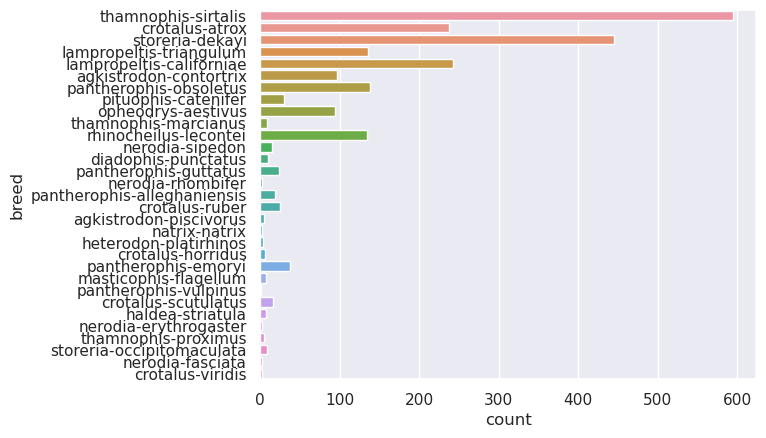

In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="breed", data=sub)

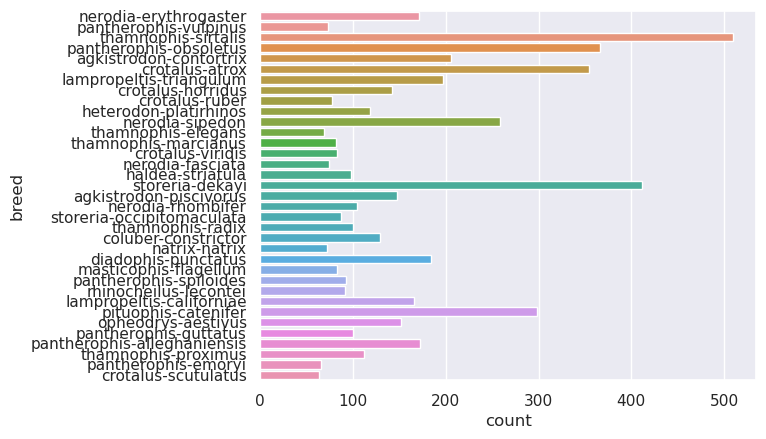

In [16]:
ax = sns.countplot(y="breed", data=train_df)